<a href="https://colab.research.google.com/github/tito-coffee/aiproject/blob/master/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Use the MNIST dataset to build the NN model that detects

 ## 1. handwritten digits and 
 ## 2. Fashion images

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

# helper below is a class that will be used to view/display the data and the graph

class helper():
  def test_network(net, trainloader):

      criterion = nn.MSELoss()
      optimizer = optim.Adam(net.parameters(), lr=0.001)

      dataiter = iter(trainloader)
      images, labels = dataiter.next()

      # Create Variables for the inputs and targets
      inputs = Variable(images)
      targets = Variable(images)

      # Clear the gradients from all Variables
      optimizer.zero_grad()

      # Forward pass, then backward pass, then update weights
      output = net.forward(inputs)
      loss = criterion(output, targets)
      loss.backward()
      optimizer.step()

      return True


  def imshow(image, ax=None, title=None, normalize=True):
      """Imshow for Tensor."""
      if ax is None:
          fig, ax = plt.subplots()
      image = image.numpy().transpose((1, 2, 0))

      if normalize:
          mean = np.array([0.485, 0.456, 0.406])
          std = np.array([0.229, 0.224, 0.225])
          image = std * image + mean
          image = np.clip(image, 0, 1)

      ax.imshow(image)
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      ax.tick_params(axis='both', length=0)
      ax.set_xticklabels('')
      ax.set_yticklabels('')

      return ax


  def view_recon(img, recon):
      ''' Function for displaying an image (as a PyTorch Tensor) and its
          reconstruction also a PyTorch Tensor
      '''

      fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
      axes[0].imshow(img.numpy().squeeze())
      axes[1].imshow(recon.data.numpy().squeeze())
      for ax in axes:
          ax.axis('off')
          ax.set_adjustable('box-forced')

  def view_classify(img, ps, version="MNIST"):
      ''' Function for viewing an image and it's predicted classes.
      '''
      ps = ps.data.numpy().squeeze()

      fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
      ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
      ax1.axis('off')
      ax2.barh(np.arange(10), ps)
      ax2.set_aspect(0.1)
      ax2.set_yticks(np.arange(10))
      if version == "MNIST":
          ax2.set_yticklabels(np.arange(10))
      elif version == "Fashion":
          ax2.set_yticklabels(['T-shirt/top',
                              'Trouser',
                              'Pullover',
                              'Dress',
                              'Coat',
                              'Sandal',
                              'Shirt',
                              'Sneaker',
                              'Bag',
                              'Ankle Boot'], size='small');
      ax2.set_title('Class Probability')
      ax2.set_xlim(0, 1.1)

      plt.tight_layout()


## Download the MNIST dataset

In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data with mean and sd 0.5, 
# this is important because it helps helps to reduce image pixels sizes (0 to 1)
# before computation
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

## the trainloader is the the iterator over the entire data set which in each iteration
## extracts 64 shuffled images

In [0]:
## create an iterator over the trainloader 
# which in itself is an iterator

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


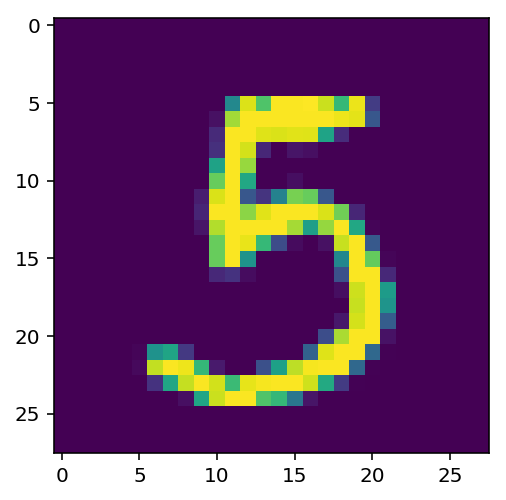

In [0]:
# dislplay a sample image
plt.imshow(images[63].numpy().squeeze());

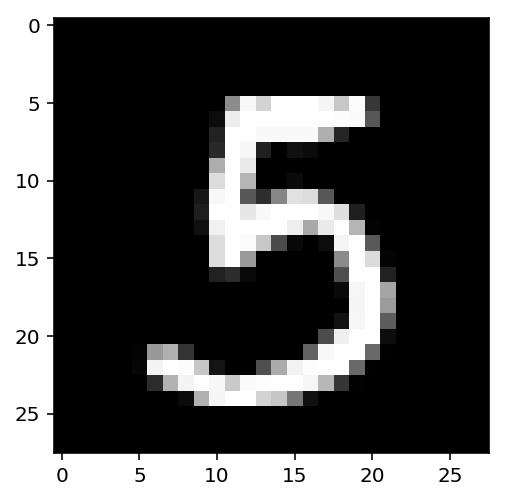

In [0]:
## display a sample image in grayscale
# this is what is used in our neural network, 
# that is we take only single layer of image
plt.imshow(images[63].numpy().squeeze(), cmap='Greys_r');

In [0]:
# activation function

def activation(x):
    return 1/(1+torch.exp(-x))

# flatten the tensors from [64, 1, 28, 28] to [64, 784]
# images.shape[0] gives the batch size that is 64, 
# and the argument -1 flatens the tensor
inputs = images.view(images.shape[0], -1) # features [64, 784]
print(inputs.shape)

# parameters
w1 = torch.randn(784, 256) # first weight matrix [784, 256]
print(w1.shape)
b1 = torch.randn(256) # first set of 256 bias units
w2 = torch.randn(256, 10) # second weight matrix [256, 10]
print(w2.shape)
b2 = torch.randn(10) # second set of 10 bias units

h = activation(torch.mm(inputs, w1) + b1)
print('h',h.shape)
out = torch.mm(h, w2) +b2
print('out',out.shape)

# print(out)

torch.Size([64, 784])
torch.Size([784, 256])
torch.Size([256, 10])
h torch.Size([64, 256])
out torch.Size([64, 10])


In [0]:

"""
    define softmax: 
    input = x, a [64x10] tensor
    dim=1 means we sum across the columns,
    torch.sum(torch.exp(x), dim=1) is the sum of [64x1] vector that is of a single column,
    however, we want the sum of all the elements across the row of tensor x, [64x10], since
    each row represents a single image
    so we use torch.sum(torch.exp(x), dim=1).view(-1,1)
"""
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)

# always verify the shape: it should be [64,10]
print(probabilities.shape)

# the probabilitis should sum to 1 like any proper probabilities
print(probabilities.sum(dim=1))


torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Pytorch's nn module can be used to define the neural network architecture. Here we build the network with 784 input units, 256 hidden units, 10 output units and a softmax output

In [0]:
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        # inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        
        # output layer
        self.output = nn.Linear(256, 10)
        
        # sigmoid activation and softmax
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        #pass the input tensor through each of our operation
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [0]:
# output the model summary
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

## nn.functional can also be used instead of nn,

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [0]:
# displays the model
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [0]:
"""create a network with 
    784 input units, 
    a hidden layer with 128 units and a ReLu activation, 
    a hidden layer with 64 units and a ReLu activation, 
    and an output layer with a softmax activation
"""

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
    def forward(self, x):
        '''forward pass through the network
            returns the output logits whose prob. sum to 1'''
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.softmax(x, dim=1)
        
        return x

In [0]:
model = Network()
model

Network(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
'''Initializing weight and biases: 
    weights and biases are automatically initialized'''

# use model.layer_name.weight to check the initialization
print(model.layer1.weight)
print(model.layer1.bias)

Parameter containing:
tensor([[-0.0042,  0.0143,  0.0081,  ...,  0.0088, -0.0019,  0.0079],
        [ 0.0149, -0.0029,  0.0214,  ..., -0.0275, -0.0323,  0.0186],
        [-0.0027,  0.0037, -0.0354,  ...,  0.0269,  0.0196,  0.0062],
        ...,
        [-0.0102, -0.0245, -0.0294,  ...,  0.0006,  0.0040,  0.0135],
        [-0.0275, -0.0256,  0.0210,  ...,  0.0007, -0.0001,  0.0292],
        [ 0.0021,  0.0159, -0.0003,  ..., -0.0309,  0.0270,  0.0170]],
       requires_grad=True)
Parameter containing:
tensor([-0.0280, -0.0179, -0.0042,  0.0221,  0.0236,  0.0328, -0.0049,  0.0119,
         0.0168, -0.0270, -0.0032, -0.0147, -0.0143,  0.0242, -0.0049, -0.0089,
        -0.0096,  0.0257, -0.0049,  0.0020,  0.0130,  0.0054, -0.0267,  0.0196,
        -0.0229,  0.0279, -0.0277, -0.0050, -0.0219, -0.0235, -0.0027, -0.0034,
         0.0154,  0.0266, -0.0212,  0.0158,  0.0274, -0.0326,  0.0222,  0.0267,
         0.0066,  0.0157,  0.0193,  0.0329,  0.0119, -0.0344,  0.0260, -0.0099,
         0.0267

In [0]:
''' we can do the custom initialization of the weights
    and biases as well;
    these are autograd variables
    to do this use model.layer_name.weight.data '''

# set biases to all zeros
model.layer1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
''' set the standard deviation to 0.01
    initialize the weights to the normal distribution
    with standard deviation 0.01'''
model.layer1.weight.data.normal_(std=0.01)

tensor([[-6.7167e-03, -4.5340e-03, -1.0369e-02,  ...,  2.2028e-02,
         -6.3604e-03,  1.5438e-02],
        [ 3.9878e-04,  3.8150e-04,  1.3960e-02,  ..., -7.5650e-03,
         -3.8271e-03, -1.0188e-04],
        [ 1.4074e-03, -7.7914e-03,  9.5245e-03,  ..., -1.0440e-02,
          1.4406e-02,  7.1108e-03],
        ...,
        [ 4.7831e-03, -3.4811e-03, -1.0685e-02,  ..., -8.4446e-03,
         -1.1946e-03, -1.1655e-02],
        [ 9.1135e-03, -2.3451e-03,  2.2659e-04,  ..., -1.6083e-03,
         -9.6205e-03, -8.0816e-04],
        [ 5.1672e-03, -6.9624e-03,  8.7545e-03,  ...,  4.1838e-05,
          1.0358e-02,  5.9644e-03]])

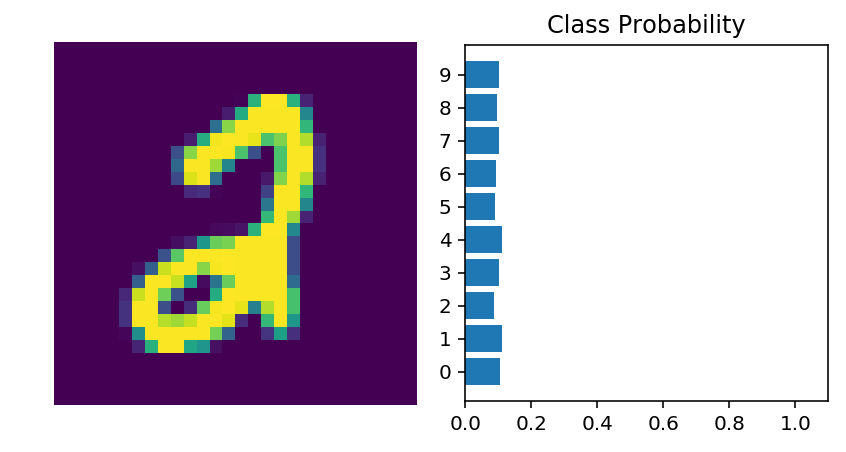

In [0]:
'''
    now we can pass an image to our network and see what happens
    
    ## RUN THIS CELL MULTIPLE TIME TO SEE DIFFERENT RESULT!
'''

# grab some data
dataitr = iter(trainloader)
images, labels = dataiter.next()

# resize images into a 1D vector
# new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784)

# forward pass through the network
img_index = 0
forward_pass = model.forward(images[img_index,:])

img = images[img_index]
helper.view_classify(img.view(1, 28, 28), forward_pass)

## Use `nn.Sequential` [documentation](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


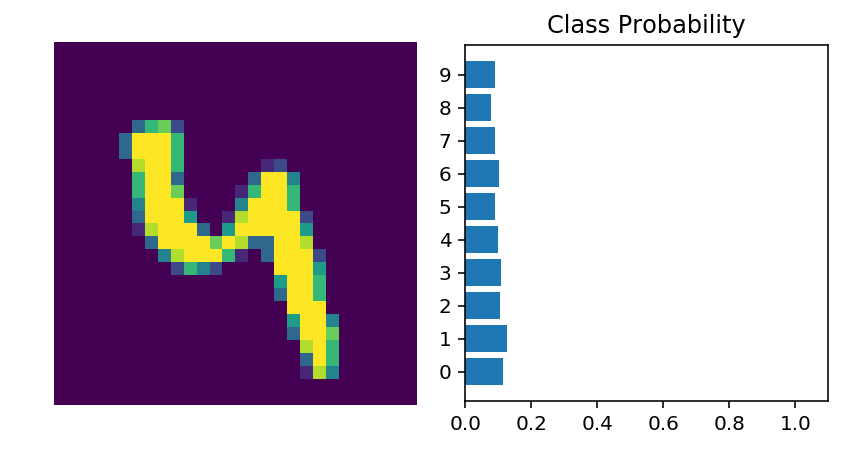

In [0]:
'''the probability distribution above shows that 
    the model doesn't know anything yet since the prediction seems same across all digits. 
    This is because the model hasnot been trained yet as all the weights are just random.

    We use `nn.sequential` to train the model 
    by passing the weights throught he sequence of operation:
'''
# Hyper parameters for our model
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# build a feed forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# forward pass through the network and display the output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
forward_pass = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), forward_pass)


## RUN THIS CELL MULTIPLE TIME TO SEE DIFFERENT RESULT!

In [0]:
# display the parameters of the each layer of the model
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0244, -0.0286,  0.0130,  ..., -0.0025, -0.0309,  0.0025],
        [ 0.0177,  0.0204,  0.0147,  ..., -0.0344, -0.0188,  0.0024],
        [ 0.0179,  0.0170,  0.0294,  ...,  0.0136, -0.0331, -0.0312],
        ...,
        [-0.0166, -0.0343,  0.0070,  ...,  0.0294,  0.0300,  0.0056],
        [ 0.0187, -0.0134, -0.0043,  ..., -0.0132,  0.0118,  0.0245],
        [-0.0327, -0.0033,  0.0055,  ...,  0.0357,  0.0336, -0.0351]],
       requires_grad=True)

In [0]:

#  we can also use the dictionary keys to provide 
#  the unique name for each layer
from collections import OrderedDict

In [0]:

model = nn.Sequential(OrderedDict([
    ('layer1', nn.Linear(input_size, hidden_sizes[0])),
    ('relu1', nn.ReLU()),
    ('layer2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(hidden_sizes[1], output_size)),
    ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [0]:
# now we can use those unique kyes to check the parameter instead of using the index
print(model[0])
# print(model.layer1)

Linear(in_features=784, out_features=128, bias=True)


## Training Neural Network

In [0]:
""" finding a function that maps our input to output
    loss function: a measure of the performance of the neural network
    Gradiant descent
    Backpropagation
    forward and backward pass
    """
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss

""" with softmax, cross entropy loss is used:
    to calculate the loss, we define the loss first adn then pass the output of our network and the correct labels"""
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
print(images.size)
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

<built-in method size of Tensor object at 0x7f6c81991f30>
tensor(2.2910, grad_fn=<NllLossBackward>)


In [0]:
"""
    here we use the log softmax (allows us to get the probabilities 
    by taking the exponential torch.exp(output)),
    with the log-softmax, we use the negative log likelihood loss,    
"""

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax())
criterion = nn.NLLLoss()
images,labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logits = model(images)
loss = criterion(logits, labels)

print(loss)

tensor(2.3409, grad_fn=<NllLossBackward>)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [0]:
from torch import optim

In [0]:
"""
    training the entire datasets with 
    gradient descent using grad module
    and optimizing the model using optim package
"""

model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax())
criterion = nn.NLLLoss()# negative log likelihood loss
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(e+1, " Training loss: ")
        print(running_loss/len(trainloader))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


1  Training loss: 
1.899273228416565
2  Training loss: 
0.867082416058095
3  Training loss: 
0.5286935313360523
4  Training loss: 
0.428642510430518
5  Training loss: 
0.3831944659765341


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


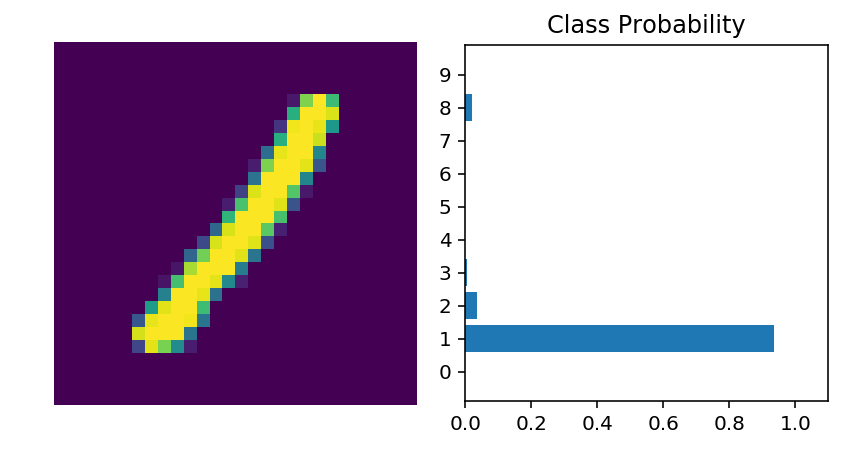

In [0]:
# display the result
## RUN THIS CELL MULTIPLE TIME TO SEE DIFFERENT RESULT!

%matplotlib inline

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

## Fashion-MNIST prediction

In [0]:
import torch
from torch import nn, optim
from torchvision import transforms, datasets

import torch.nn.functional as f

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.FashionMNIST('~/.pytorch/Fashion_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.FashionMNIST('~/.pytorch/Fashion_MNIST_data/', download=True, train=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

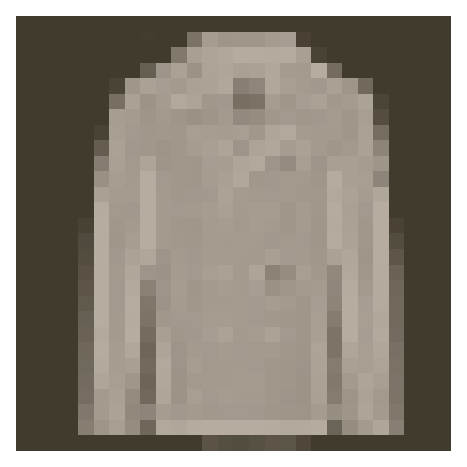

In [0]:
images, labels = next(iter(trainloader))
helper.imshow(images[0])


In [0]:
# the network architecture
class neural_network(nn.Module):
    def __init__(self):
        super(neural_network, self).__init__()
        self.layer1 = nn.Linear(784, 264)
        self.layer2 = nn.Linear(264, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
    def forward(self, data):
        data = data.view(data.shape[0], -1)
        data = f.relu(self.layer1(data))
        data = f.relu(self.layer2(data))
        data = f.relu(self.layer3(data))
        data = f.log_softmax(self.layer4(data), dim=1)
        
        return data
    
# can also be defined using the sequential model
# model = nn.Sequential(nn.Linear(784, 256),
#                       nn.ReLU(),
#                       nn.Linear(256, 128),
#                       nn.ReLU(),
#                       nn.Linear(128, 64),
#                       nn.ReLU(),
#                       nn.Linear(64, 10),
#                       nn.LogSoftmax())

In [0]:
model = neural_network()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

In [0]:
# train the networl
epochs = 5
for i in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1) # flatten the input data
        optimizer.zero_grad() # clear the gradients since they get accumulated
        
        # deploy the four stpes of training:
        output = model.forward(images) # forward pass to get output
        loss = criterion(output, labels) # loss calculation
        loss.backward() # backward pass of loss
        optimizer.step() # weights update
        
        running_loss += loss.item()
    else:
        print("training loss: ")
        print(running_loss/len(trainloader))

training loss: 
0.6521673725802761
training loss: 
0.41769061153377296
training loss: 
0.368564244891916
training loss: 
0.34034271527931637
training loss: 
0.31682694345903295


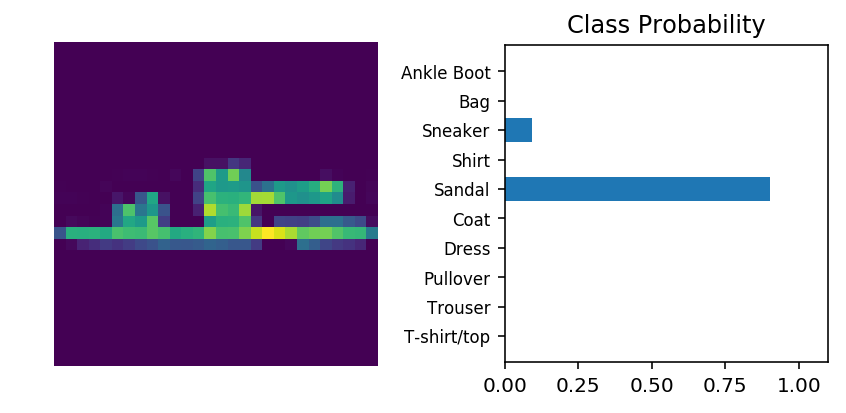

In [0]:
%matplotlib inline
## RUN THIS CELL MULTIPLE TIME TO SEE DIFFERENT RESULT!

images, labels = next(iter(testloader))
image = images[0].view(1, 784)

# turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(image)
    probabilities = f.softmax(logits, dim=1)
helper.view_classify(image.view(1, 28, 28), probabilities, version='Fashion')

## Validation

Now the model is trained, we can make it even better by using validation. Validation is prediction of our model that is performed in test data (unseeen data by the model). If we graph the train loss and test loss we will see that test loss gets higher, this is because the model is failing to generalize the train data, which means model is not good enough to predict on the unseen data. This is also known as VOERFITTING, and to avoid this we will use sth called overfitting.


In [0]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data, `train=False`
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:02, 9640489.45it/s]                              


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 70842.52it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 2999962.12it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 25554.65it/s]            

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
class neural_network(nn.Module):
    def __init__(self):
        super(neural_network, self).__init__()
        self.layer1 = nn.Linear(784, 264)
        self.layer2 = nn.Linear(264, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
    def forward(self, data):
        data = data.view(data.shape[0], -1)
        data = f.relu(self.layer1(data))
        data = f.relu(self.layer2(data))
        data = f.relu(self.layer3(data))
        data = f.log_softmax(self.layer4(data), dim=1)
        
        return data

In [0]:
model = neural_network()

images, labels = next(iter(trainloader))
probabilities = torch.exp(model(images)) # get the class probabilites
print(probabilities.shape) # we should get 10 class probabilities for 64 input images

torch.Size([64, 10])


In [0]:
# get the touple of top k values and corresponding top k classes
top_value, top_class = probabilities.topk(1, dim=1)

# look at the most likely classes for first 10 examples
print(top_class[:10,:])
# print(top_value[:10,:])

tensor([[2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2]])


In [0]:
# now we compare the predicted classes and equal classes
# euqals will be like [1 0 1 1 0 0 0 1 1 1 1 . . .] of data type `torch.ByteTensor`
# if the labels are correctly predected then the result is assigned as 1 and 0 otherwise
equals = top_class == labels.view(top_class.shape)


In [0]:
"""
    equals = [1 0 1 1 0 0 0 1 1 1 1 . . .]
    calculating the accuracy is as simple as calculating the mean of the floating values of equals; 
    however, torch.mean does not support the data type of equals [torch.ByteTensor] therefore 
    we need to convert it to torch.FloatTensor
"""

accuracy = torch.mean(equals.type(torch.FloatTensor))
print('Accuracy:')
print(accuracy.item()*100)

Accuracy:
12.5


In [0]:
# implementing validation
model = neural_network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        ## Implement the validation pass and print out the validation accuracy
        test_loss = 0
        accuracy = 0
        #turn off the gradients, since we do not update the parameters during validation
        with torch.no_grad():
            for images, labels in testloader:
                # pass the validation data through the model
                output = model(images)
                test_loss += criterion(output, labels)
                probabilities = torch.exp(output)
                # get the touple of top values and top class predicted
                top_value, top_class = probabilities.topk(1, dim=1)
                # compare the predicted class with the actual labels, returns floating values
                equals = top_class == labels.view(*top_class.shape)
                # calculate the mean of equals, or accuracy
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.520..  Test Loss: 0.472..  Test Accuracy: 0.825
Epoch: 2/30..  Training Loss: 0.394..  Test Loss: 0.437..  Test Accuracy: 0.842
Epoch: 3/30..  Training Loss: 0.358..  Test Loss: 0.396..  Test Accuracy: 0.859
Epoch: 4/30..  Training Loss: 0.335..  Test Loss: 0.373..  Test Accuracy: 0.867
Epoch: 5/30..  Training Loss: 0.317..  Test Loss: 0.374..  Test Accuracy: 0.868
Epoch: 6/30..  Training Loss: 0.305..  Test Loss: 0.373..  Test Accuracy: 0.872
Epoch: 7/30..  Training Loss: 0.292..  Test Loss: 0.358..  Test Accuracy: 0.875
Epoch: 8/30..  Training Loss: 0.282..  Test Loss: 0.368..  Test Accuracy: 0.871
Epoch: 9/30..  Training Loss: 0.275..  Test Loss: 0.372..  Test Accuracy: 0.873
Epoch: 10/30..  Training Loss: 0.269..  Test Loss: 0.347..  Test Accuracy: 0.882
Epoch: 11/30..  Training Loss: 0.259..  Test Loss: 0.361..  Test Accuracy: 0.881
Epoch: 12/30..  Training Loss: 0.256..  Test Loss: 0.345..  Test Accuracy: 0.882
Epoch: 13/30..  Training Loss: 0.250.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

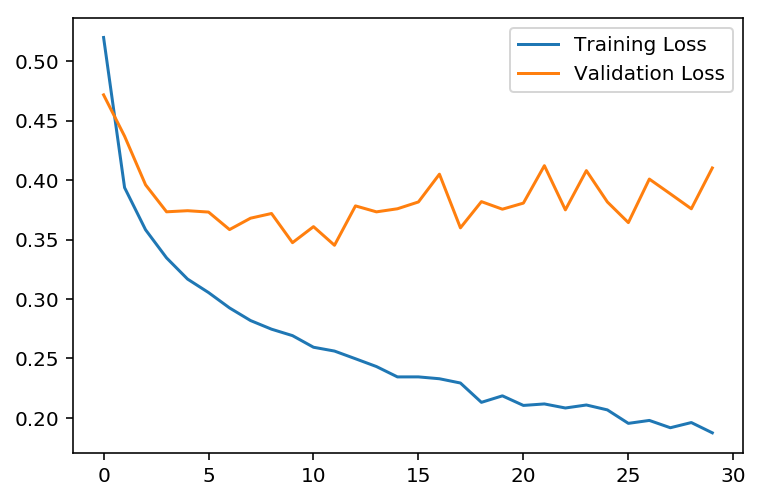

In [0]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.legend(frameon='False')

## Overfitting

The huge difference between the training loss and the validation loss as shown is the above graph is what is knwn as overfitting.

As the network is trained it learns better about the training data constantly updating the weights; however, when the network is applied to test/unseen data it fails to generalize what it has learned. This results in higher validation loss than training loss.

A method called `dropout` is used, where input units are randomly dropped. This forces the network to share information between weights, increasing it's ability to generalize to new data. 

In [0]:
class neural_network(nn.Module):
    def __init__(self):
        super(neural_network, self).__init__()
        
        self.layer1 = nn.Linear(784, 264)
        self.layer2 = nn.Linear(264, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p=0.2) # drop out with the probability of 0.2
    def forward(self, data):
        data = data.view(data.shape[0], -1)
        
        data = self.dropout(f.relu(self.layer1(data)))
        data = self.dropout(f.relu(self.layer2(data)))
        data = self.dropout(f.relu(self.layer3(data)))
        data = f.log_softmax(self.layer4(data), dim=1) # no dropout in the output since we want all classes :D
        
        return data

In [0]:
## Train your model with dropout, and monitor the training progress with the validation loss and accuracy
model = neural_network()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.003)
epochs = 30

train_losses, test_losses = [], []
for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad(): # turns off gradients, saves memory and boosts speed
            model.eval() # turns off the drop out
            for images, labels in testloader:
                output = model(images)
                test_loss += criterion(output, labels)
                probabilities = torch.exp(output)
                
                top_value, top_class = probabilities.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train() # truns back the dropout on
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(i+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))


Epoch: 1/30..  Training Loss: 2.159..  Test Loss: 1.765..  Test Accuracy: 0.362
Epoch: 2/30..  Training Loss: 1.425..  Test Loss: 1.030..  Test Accuracy: 0.674
Epoch: 3/30..  Training Loss: 1.016..  Test Loss: 0.805..  Test Accuracy: 0.718
Epoch: 4/30..  Training Loss: 0.860..  Test Loss: 0.723..  Test Accuracy: 0.722
Epoch: 5/30..  Training Loss: 0.781..  Test Loss: 0.671..  Test Accuracy: 0.745
Epoch: 6/30..  Training Loss: 0.729..  Test Loss: 0.637..  Test Accuracy: 0.756
Epoch: 7/30..  Training Loss: 0.691..  Test Loss: 0.610..  Test Accuracy: 0.767
Epoch: 8/30..  Training Loss: 0.660..  Test Loss: 0.587..  Test Accuracy: 0.779
Epoch: 9/30..  Training Loss: 0.630..  Test Loss: 0.568..  Test Accuracy: 0.792
Epoch: 10/30..  Training Loss: 0.610..  Test Loss: 0.551..  Test Accuracy: 0.800
Epoch: 11/30..  Training Loss: 0.591..  Test Loss: 0.538..  Test Accuracy: 0.804
Epoch: 12/30..  Training Loss: 0.572..  Test Loss: 0.523..  Test Accuracy: 0.808
Epoch: 13/30..  Training Loss: 0.555.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

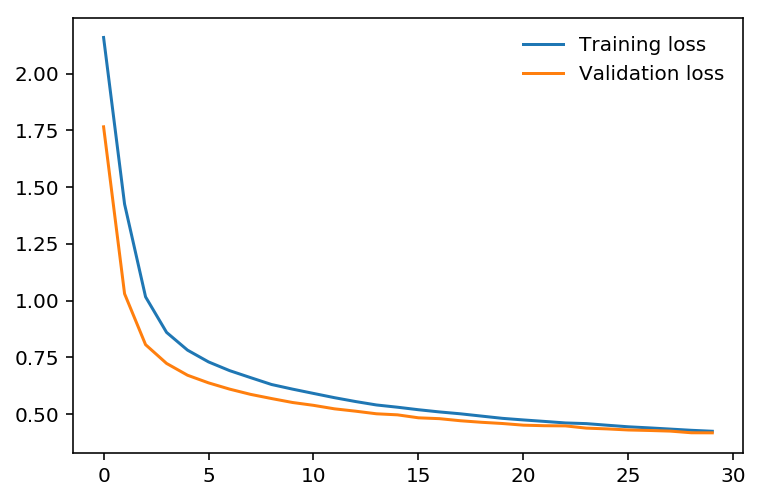

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


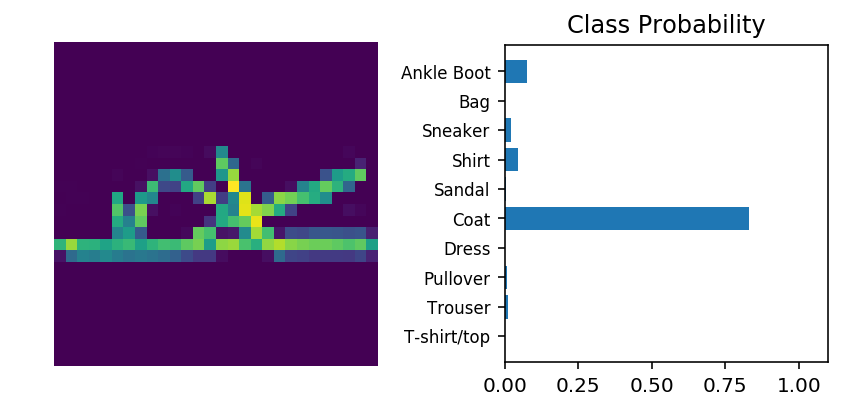

In [0]:
"""
    As we can see in the graph above that we have better result now with validation
    and training loss as almost same and as low as possible
    
    Predection:
    
    ## RUN THIS CELL multiple time to see different results!
"""

# Testing the network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

# THE END :)